# Python data analysis tutorial

## Some preliminaries:

Hopefully everyone has followed the installation instructions [here](https://github.com/drussellmrichie/uconn_jterm_python_workshops). Everything I'll be working with is in the `python-data-analysis` folder of the repo. If you have not completed those steps for whatever reason, it'd be better if we didn't spend time today troubleshooting those issues. If your machine is not totally setup to follow today's tutorial, just follow along with a partner and/or watch my projection. And after today, I'd be happy to get you setup on your own machine.

**We're covering a lot of tools that could each probably fill hours of tutorial. The goal this session is not to give you complete command of them, but to give a taste of what you can do, and give you motivation and means to learn further.**

If something isn't clear, do feel free to ask questions (although sometimes I'll explicitly say that understanding a particular code chunk isn't very important). And of course, I am happy to field questions about Python-related things after today,  for both things that I speed through and those that I spend more time on!

In this session, everything will be taught and demonstrated in a...

## [Jupyter notebook](https://jupyter.org/)

...which is a web application that allows you to create and share documents that contain explanatory text (in markdown syntax, like HTML), live (Python) code and code output...

In [1]:
word = 'Maude and June'
for letter in word:
    #print((' ' + letter) * len(word))
    print(letter)

M
a
u
d
e
 
a
n
d
 
J
u
n
e


...equations...

$$x_{1,2} = \frac{-b \pm \sqrt{b^2-4ac}}{2b}.$$

...and visualizations produced by Python code. A quick note about that:

Today I'll be working in a dark Jupyter Notebook theme, which I acquired by using the package I mentioned on this notebook's github repo (and linked [here](https://github.com/dunovank/jupyter-themes)). If you want to work in the default, pretty bright theme, it looks like this:

![](https://docs.microsoft.com/en-us/azure/virtual-machines/media/virtual-machines-linux-jupyter-notebook/ipy-notebook-spectral.png)

To accommodate the dark Jupyter theme, I am also modifying the default style for `seaborn`, the visualization package we'll use, to make plots that look legible on this darker background. If you are working in the default theme, you don't need to run the `set_style` chunk below (you can comment it out).

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
"""
In case we haven't gone over numpy yet, it's another major scientific package. A lot of pandas
is actually numpy "under the hood". We'll only barely use it, but you'll probably eventually 
tangle with it if you do scientific computing with Python.
"""
import matplotlib
#matplotlib.style.use('ggplot')

# if you want the default, bright seaborn style, comment out with # or """""" the chunk below
sns.set_style({  'axes.facecolor': 'gray',
                 'axes.labelcolor': 'white',
                 'figure.facecolor': 'gray',
                 'grid.color': '.8',
                 'image.cmap': u'Greys',
                 'text.color': 'white',
                 'xtick.color': 'white',
                 'ytick.color': 'white'})

%matplotlib inline

We'll quickly contrast this modified seaborn style with the default by loading a dataset that comes with `seaborn`, a dataset of restaurant tipping. (So this is a section where understanding the code examples isn't critical.)

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


And so we'll just try to make barplot of tips, broken down by tippers gender and smoker status.

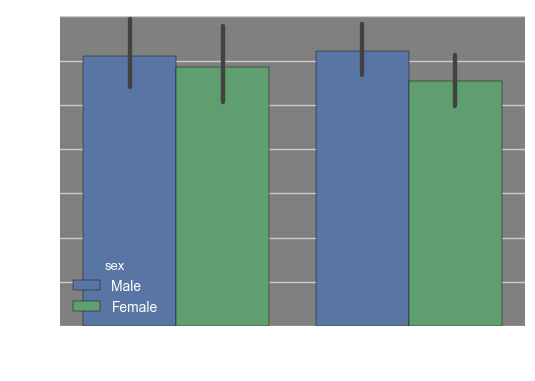

In [4]:
sns.barplot(x='smoker',y='tip',hue='sex',data=tips);

Again, if you are working in the default seaborn style, you should see something like the below (these are plots of different data, but that's not important):

![](http://seaborn.pydata.org/_images/factorplot_bars.png)

For rest of tutorial, I'll just be using the dark style I set up, and I won't bring up any really bright images.

So those are the main capabilities of the notebook. When would you use that?
    - Teaching and demonstration (like now...)
    - Exploratory data analysis (most of my current work for my dissertation)
    - Producing a well-documented, shareable, reproducible data analysis pipeline
    
#### Basically, #openscience.

(But don't take my word for it! [This Nature article/op-ed agrees!](http://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261))

A little more on that last bullet: if you were to try to do some of the data analysis things you can do in Python, in another program, you'd probably use something like Excel. Sometimes Excel does suffice. But, one problem with Excel is that *it doesn't make transparent the process by which you obtained your final data analysis product*. Usually you just end up with a single, static spreadsheet with, e.g., a scatterplot with a regression equation and line, and it'll often not be clear to someone looking at that spreadsheet *how you got there* (unless they were already extensively familiar with your project).

*Jupyter notebooks, and other documents like them, present a linear process that makes it clear how you got from raw data to your final analyses.*

### Using the jupyter notebook

Working on a jupyter notebook is basically all about making 'cells', the chunks with markdown or code, and running them, moving them, etc.

Make a couple cells now, at least one with code and one with markdown, and run them. (Maybe also explore the toolbar and see what else you can do -- cut/paste/split/merge/run-all-above).

In [5]:
# a code cell, maybe?

In [6]:
# maybe you could change this to a markdown cell?

In [7]:
# you could merge this with the cell above, why not?

## Data analysis

If you do data analysis in Python, your workhorse will be:

### Pandas
A summary of [*pandas*](http://pandas.pydata.org/) from its documentation:

> pandas is an open source...library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

The basic datastructures of `pandas` are `Series` and, more importantly, `DataFrames`. 

A `Series` is sort of like a list -- its a sequence of items -- but it has labels on each of the items, and it has special attributes and methods available to it. (If this is abstract now, it will become more concrete in a moment!)

A `DataFrame` is basically a data table, with labeled rows and columns. Often, each row will be a participant/observation, and each column will be a variable/measurement -- this is known as ['tidy' data](http://vita.had.co.nz/papers/tidy-data.pdf). If your data are 'tidy', then you can oftentimes just slide them into existing off-the-shelf Python data analysis tools like those we'll be using. Again, this will be clearer later on. Like series, dataframes also afford special attributes and methods.

We'll start our tutorial of `pandas` (and `seaborn` and stats packages like `scipy.stats` and/or `statsmodels`) with a dataset from....:

## Wordbank

[Wordbank](http://wordbank.stanford.edu/) is an open database of information about children's vocabulary growth. Wordbank archives data from the MacArthur-Bates Communicative Development Inventory (MB-CDI), a family of parent-report questionnaires. Wordbank enables researchers to analyze MB-CDI data in terms of aggregate vocabulary, individual items, demographic variables, and more.

*If we have time*, we'll replicate a couple different analyses that the Wordbank group has done, like [gender differences in vocab development](https://mikabr.github.io/demo-vocab/gender.html) and [maternal education differences in vocab development](https://mikabr.github.io/demo-vocab/momed.html). (Neither is earth-shattingly novel, but they'll illustate python data analysis nicely.)

First, though, let's go through some pandas basics! To do that, we'll look at one particular aggregated dataset available from wordbank (it should be in the repo): `administration_data.csv`.

Pandas can load lots of different tabular data formats, ranging from csv's, to excel files, to .txts. To see the different ways it can read in data, put your cursor in the next cell, after the `_` and press `tab`.

Remember that at the top of this notebook, we did `import pandas as pd`. So we'll prefix calling pandas functionality with `pd`. (This is a conventional way to abbreviate pandas for convenience sake. Many packages have similar conventional abbervations, like `import numpy as np` and `import seaborn as sns`.)

In [8]:
pd.read_

AttributeError: module 'pandas' has no attribute 'read_'

You should see a lot of different options, like `read_csv`, `read_table`, `read_html`.

A brief aside: 

This example also illustrated so-called 'tab completion'. Many programming environments (IDE's, code-aware text editors, etc.) are smart enough to suggest completions to partially typed commands/lines. This is VERY helpful when you sooooort of know how to complete a command, but aren't completely certain -- crucial when at the start of the learning curve. Or, even if you do know, it can save time as it can save you several keystrokes (this may sound trivial but I promise it's not).

Back to reading in our data....our data file is a csv, so we do...:

In [9]:
# this assumes that your current working directory is 
# */uconn_jterm_python_workshops/python-data-analysis

admin_data = pd.read_csv('wordbank-data/administration_data.csv')

Let's take a look...

In [10]:
admin_data

,data_id,language,form,age,gender,mom_ed,comprehension,production
0,29821.0,Croatian,WG,13,Female,NaN,293,88
1,29822.0,Croatian,WG,16,Male,NaN,122,12
2,29823.0,Croatian,WG,9,Female,NaN,3,0
3,29824.0,Croatian,WG,12,Female,NaN,0,0
4,29825.0,Croatian,WG,12,Female,NaN,44,0
5,29826.0,Croatian,WG,8,Male,NaN,14,5
6,29827.0,Croatian,WG,9,Male,NaN,2,1
7,29828.0,Croatian,WG,10,Male,NaN,44,1
8,29829.0,Croatian,WG,13,Male,NaN,172,51
9,29830.0,Croatian,WG,16,Male,NaN,241,68


I'll explain what exactly this data is in a minute, but a couple things first: 

1. 67K rows by 8 columns is half a million cells/entries. That's way too much to pore over manually. And probably too much to deal with in Excel. This is exactly the size of data that motivates a programmatic approach.
2. That volume of output is a little much to spit out every time you just want to quickly peek at your data! Fortunately, there are methods for just looking at the `.head` and `.tail` of your data.

In [11]:
admin_data.head()

,data_id,language,form,age,gender,mom_ed,comprehension,production
0,29821.0,Croatian,WG,13,Female,NaN,293,88
1,29822.0,Croatian,WG,16,Male,NaN,122,12
2,29823.0,Croatian,WG,9,Female,NaN,3,0
3,29824.0,Croatian,WG,12,Female,NaN,0,0
4,29825.0,Croatian,WG,12,Female,NaN,44,0


In [12]:
admin_data.tail(10)

,data_id,language,form,age,gender,mom_ed,comprehension,production
67481,107652.0,Czech,WS,22,Female,Graduate,137,137
67482,107653.0,Czech,WS,18,Male,Secondary,32,32
67483,107654.0,Czech,WS,18,Female,College,71,71
67484,107655.0,Czech,WS,24,Female,Graduate,199,199
67485,107656.0,Czech,WS,29,Male,Some Secondary,328,328
67486,107657.0,Czech,WS,17,Female,Some Secondary,42,42
67487,107658.0,Czech,WS,16,Male,Some College,23,23
67488,107659.0,Czech,WS,18,Male,Some Secondary,71,71
67489,107660.0,Czech,WS,20,Male,Some Secondary,162,162
67490,107661.0,Czech,WS,21,Female,Graduate,28,28


Let's talk about what these data are:

Each row, uniquely identified by `data_id`, represents an administration of the CDI. The administration tests how many words (and gestures or sentences, depending on child age) a particular child produces and comprehends at a particular `age`. We also have information on the child's `gender`, the mom's education level (`mom_ed`), the `language`, and the specific version of the CDI used (`form`: WG = ['words and gestures'](http://products.brookespublishing.com/MacArthur-Bates-Communicative-Development-Inventories-CDI-Words-and-Gestures-NCS-Scannable-English-P80.aspx), for younger kids; WS = ['words and sentences'](http://products.brookespublishing.com/MacArthur-Bates-Communicative-Development-Inventories-CDI-Words-and-Sentences-NCS-Scannable-English-P81.aspx), for older kids).

**Before we continue, any questions about what these data are, exactly?**

### Basic attributes and methods of our dataframe

In [13]:
admin_data.shape

(67491, 8)

In [14]:
admin_data.dtypes # I actually don't access dtypes that often but YMMV

data_id          float64
language          object
form              object
age                int64
gender            object
mom_ed            object
comprehension      int64
production         int64
dtype: object

In [15]:
admin_data.columns

Index(['data_id', 'language', 'form', 'age', 'gender', 'mom_ed',
       'comprehension', 'production'],
      dtype='object')

In [16]:
admin_data.index

RangeIndex(start=0, stop=67491, step=1)

In [17]:
admin_data.describe(include='all')

,data_id,language,form,age,gender,mom_ed,comprehension,production
count,67491.000000,67491,67491,67491.000000,65123,45097,67491.000000,67491.000000
unique,NaN,22,10,NaN,2,8,NaN,NaN
top,NaN,English (British),WS,NaN,Female,College,NaN,NaN
freq,NaN,21919,31259,NaN,32608,11814,NaN,NaN
mean,71574.976619,NaN,NaN,24.084322,NaN,NaN,194.564831,171.687662
std,21461.779742,NaN,NaN,7.776028,NaN,NaN,204.145522,208.992307
min,29821.000000,NaN,NaN,7.000000,NaN,NaN,0.000000,0.000000
25%,54294.500000,NaN,NaN,18.000000,NaN,NaN,45.000000,26.000000
50%,71414.000000,NaN,NaN,24.000000,NaN,NaN,92.000000,70.000000
75%,90185.500000,NaN,NaN,30.000000,NaN,NaN,305.000000,272.000000


(`include='all'` forces the `.describe` method to include both numerical and categorical variables in the description. Otherwise, it would drop the categorical variables.)

Let's talk about this output for a second...

....returning now to the attributes and methods that are dataframe affords...:

If you type `admin_data.` and press tab, again, you'll see a smorgasbord of options for DataFrame attributes and methods, most of which I couldn't tell you the meaning of! But suffice to say, there's a lot of functionality here, and even if you only know a fraction of it, you can do quite a lot!

In [18]:
admin_data.

SyntaxError: invalid syntax (<ipython-input-18-44b8dd8fbe84>, line 1)

### Selecting data

(Selecting subsets of columns and/or rows)

Before we try to access rows, it's a good idea to change the index (more on that in a sec)...

In [18]:
admin_data.set_index('data_id')

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0
29826.0,Croatian,WG,8,Male,NaN,14,5
29827.0,Croatian,WG,9,Male,NaN,2,1
29828.0,Croatian,WG,10,Male,NaN,44,1
29829.0,Croatian,WG,13,Male,NaN,172,51


In [19]:
admin_data.head()

,data_id,language,form,age,gender,mom_ed,comprehension,production
0,29821.0,Croatian,WG,13,Female,NaN,293,88
1,29822.0,Croatian,WG,16,Male,NaN,122,12
2,29823.0,Croatian,WG,9,Female,NaN,3,0
3,29824.0,Croatian,WG,12,Female,NaN,0,0
4,29825.0,Croatian,WG,12,Female,NaN,44,0


Hey, what happened? Why isn't our index `data_id`? Before you read on, any guesses?

Well, this is because the default behavior of the `.set_index` method, and many others, is to return a *new* object. We didn't assign that new object to any variable, so it just disappeared into the aether.

There's two ways to 'solve' this. One is, as I said, to assign the output of `.set_index` to a new object, like so:

In [20]:
reindex_admin_data = admin_data.set_index('data_id')
reindex_admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0


Or, we can set an `inplace` parameter of the `.set_index` method to `True`. That will make the method directly modify the original `admin_data` DataFrame. So, if we then call `admin_data`, we get a DataFrame with the new index.

In [21]:
admin_data.set_index('data_id', inplace=True)
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0


Now we can demonstrate accessing rows and columns a couple different ways.

In general, rows and columns can be access either by label (index in the case of rows, column name in the case of columns) or integer (i.e., get the 0th, 1st, 2nd, etc row or column -- remember 0-based indexing in Python?).

Label-based selection of a column:

In [22]:
admin_data['language'].head() # again using the head method because I don't need to see much

data_id
29821.0    Croatian
29822.0    Croatian
29823.0    Croatian
29824.0    Croatian
29825.0    Croatian
Name: language, dtype: object

(Accessing a single column or row returns a *Series*.)

Label-based selection of a row:

In [24]:
admin_data.loc[29821.0].head() # this is the label/index for the top row

language    Croatian
form              WG
age               13
gender        Female
mom_ed           NaN
Name: 29821.0, dtype: object

Integer-based selection of a column:

In [25]:
admin_data.iloc[:,0].head()

data_id
29821.0    Croatian
29822.0    Croatian
29823.0    Croatian
29824.0    Croatian
29825.0    Croatian
Name: language, dtype: object

Integer-based selection of a row:

In [26]:
admin_data.iloc[0,:].head()

language    Croatian
form              WG
age               13
gender        Female
mom_ed           NaN
Name: 29821.0, dtype: object

In case that's a little obscure, the [#,#] pattern first indicates the label or integer indexes of the rows you want, then the indexes of the columns you want.

So why did we change the index with `.set_index` earlier? Because otherwise the label vs integer distinction would get obfuscated if our index labels *were* integers!

For both label- and integer-based selection, you can also select slices of multiple rows and/or columns at once, like this:

In [27]:
admin_data.loc[29821.0:29825.0,'language':'mom_ed'] # the first few rows and first few columns

,language,form,age,gender,mom_ed
data_id,,,,,
29821.0,Croatian,WG,13,Female,NaN
29822.0,Croatian,WG,16,Male,NaN
29823.0,Croatian,WG,9,Female,NaN
29824.0,Croatian,WG,12,Female,NaN
29825.0,Croatian,WG,12,Female,NaN


In [ ]:
# Try a couple different selections

In [ ]:
# Try a label-based one

In [ ]:
# try an integer-based one. 

In [28]:
# Try a *slice*!

When do you access by label vs column? In my experience, accessing by label is more intuitive and common, but sometimes you will access by integer. (I've been doing that when re-ordering columns, for example, like so: `admin_data = admin_data.iloc[:,[0,2,3,1,4]]`. That's often quicker than typing out all the column names.

In [29]:
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88
29822.0,Croatian,WG,16,Male,NaN,122,12
29823.0,Croatian,WG,9,Female,NaN,3,0
29824.0,Croatian,WG,12,Female,NaN,0,0
29825.0,Croatian,WG,12,Female,NaN,44,0


I wonder what the most verbose CDI records are...let's try sorting by `production`.

In [30]:
admin_data.sort_values('production',ascending=False).head(10)

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
80006.0,Mandarin,WS,30,Female,NaN,798,798
79940.0,Mandarin,WS,28,Female,NaN,798,798
79919.0,Mandarin,WS,28,Male,NaN,797,797
80018.0,Mandarin,WS,30,Female,NaN,796,796
79973.0,Mandarin,WS,29,Female,NaN,796,796
79922.0,Mandarin,WS,28,Male,NaN,795,795
79875.0,Mandarin,WS,26,Female,NaN,795,795
79830.0,Mandarin,WS,25,Female,NaN,795,795
79958.0,Mandarin,WS,29,Male,NaN,793,793


And what's at the bottom?

In [ ]:
# what would you modify to get the CDI admins revealing the *least* productive kids?
admin_data.sort_values('production',ascending=False).head(10)

A couple notes:

1. This example also illustrates 'method-chaining'. I first called the `.sort_values()` method, and then fed its output to `.head()`. Once you get the hang of Pandas, you'll be doing this all the time.)
2. I didn't specify the `inplace` parameter as `True`! That was intentional -- I just wanted to get a quick, temporary view of the sorted data -- I don't want that sort_values to persist in our dataframe.

So the administrations revealing the most comprehension and production were given to Chinese-exposed children. I won't interpret that much -- we should probably consider cross-linguistic differences in maybe the construction of the CDI and what counts as a word in different languages?

Letty here? Thoughts?

Sometimes you want to just select certain rows/columns based on the values *in* certain cells. For example, maybe we just want to get all the Mandarin-exposed administrations:

In [32]:
admin_data.query('language=="Mandarin"').head(10)

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
41618.0,Mandarin,TC,17,NaN,NaN,61,61
41619.0,Mandarin,TC,17,NaN,NaN,40,40
41620.0,Mandarin,TC,17,NaN,NaN,30,30
41621.0,Mandarin,TC,17,NaN,NaN,32,32
41622.0,Mandarin,TC,17,NaN,NaN,29,29
41623.0,Mandarin,TC,17,NaN,NaN,228,228
41624.0,Mandarin,TC,17,NaN,NaN,26,26
41625.0,Mandarin,TC,17,NaN,NaN,51,51
41626.0,Mandarin,TC,17,NaN,NaN,94,94


A little more complex: just the male Mandarin-exposed admins?

In [33]:
admin_data.query('language=="Mandarin" & gender=="Male"').head(10)

,language,form,age,gender,mom_ed,comprehension,production
data_id,,,,,,,
78965.0,Mandarin,WS,16,Male,NaN,71,71
78966.0,Mandarin,WS,16,Male,NaN,253,253
78967.0,Mandarin,WS,16,Male,NaN,42,42
78968.0,Mandarin,WS,16,Male,NaN,8,8
78969.0,Mandarin,WS,16,Male,NaN,22,22
78970.0,Mandarin,WS,16,Male,NaN,5,5
78971.0,Mandarin,WS,16,Male,NaN,9,9
78972.0,Mandarin,WS,16,Male,NaN,11,11
78973.0,Mandarin,WS,16,Male,NaN,8,8


And you can make those queries way more complicated, combining disjunction (OR), negation, inequalities (>, <, !=), etc etc.

In [ ]:
# Try a query!

In [35]:
# Or two!

What if we wanted to suddenly add new data to our DataFrame? Maybe the gender of the parent filling out the CDI? One could imagine that would influence the completion of the CDI report.

Obviously we don't have that data, so let's just randomly simulate some data. Let's just imagine that for each admin, there's an 80% probability that a mom filled it out (I have no idea if this is accurate).

This is going to be a slightly complicated example, so don't worry if you don't totally get the first two lines.

In [35]:
random_floats  = np.random.random(size=len(admin_data)) # sample floats uniformly b/w 0 and 1
parent_genders = ['Mal' if x > .8 else 'Female' for x in random_floats] # <-- list comp w/ if-else

admin_data['parent_gender'] = parent_genders
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production,parent_gender
data_id,,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88,Female
29822.0,Croatian,WG,16,Male,NaN,122,12,Mal
29823.0,Croatian,WG,9,Female,NaN,3,0,Female
29824.0,Croatian,WG,12,Female,NaN,0,0,Female
29825.0,Croatian,WG,12,Female,NaN,44,0,Female


We can -- and should! -- doublecheck that we have about 80% moms in the `parent gender` column:

In [36]:
admin_data['parent_gender'].describe()

count      67491
unique         2
top       Female
freq       53950
Name: parent_gender, dtype: object

Frequency divided by count looks close to 80%. So good.

Oh, dear! I mispelled `Male` as `Mal` in the `parent_gender` column! We should fix that!

In [37]:
admin_data['parent_gender'].replace(to_replace='Mal',value='Male',inplace=True)
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production,parent_gender
data_id,,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88,Female
29822.0,Croatian,WG,16,Male,NaN,122,12,Male
29823.0,Croatian,WG,9,Female,NaN,3,0,Female
29824.0,Croatian,WG,12,Female,NaN,0,0,Female
29825.0,Croatian,WG,12,Female,NaN,44,0,Female


Phew. In fact, I wonder if there are any other mispellings or other oddities in the data. That's usually one of the first things you should check when you look at your data!

So, do we have any missing data? (We actually did see this from `admin_data.describe(include='all')` earlier, but let's try another way)

In [38]:
admin_data.isnull().head()

,language,form,age,gender,mom_ed,comprehension,production,parent_gender
data_id,,,,,,,,
29821.0,False,False,False,False,True,False,False,False
29822.0,False,False,False,False,True,False,False,False
29823.0,False,False,False,False,True,False,False,False
29824.0,False,False,False,False,True,False,False,False
29825.0,False,False,False,False,True,False,False,False


Well, now that's not completely helpful. We could already see that `mom_ed` was unspecified from the very first `.head` views of the DataFrame. Is there maybe a more convenient way to see if the other columns have *any* missing values?

Yes!

In [39]:
admin_data.drop('mom_ed',axis=1).isnull().any()

language         False
form             False
age              False
gender            True
comprehension    False
production       False
parent_gender    False
dtype: bool

Okay, let's unpack that method-chain! We first `.drop()` a column (that's axis=1) -- again, not inplace! -- that we specified. We then checked if any of the remaining data `.isnull()` (like above). Then, we checked each of those columns to see if they had `.any()` `True` entries (which would indicate, yes, there's a missing value here!)

So this revealed that we're missing some gender data! We could get to the bottom of that (see where the missing gender data are, whether they systematically afflict some particular subset, what would happen if we just drop those rows, etc etc), but for time's sake, let's move on...!

Let's recap. So far we've covered:
- selecting (subsets) of data
- sorting the data
- adding new data to a dataframe
- 'cleaning'/'fixing' errors
- checking for missing values

**Before we shift gears to slightly/somewhat more meaningful exploratory data analysis, any questions? Anything I should go over again?**

We'll do more `pandas` sorts of things, but to mix things up (and recapture your interest!), let's take a diversion into:

###  Seaborn

From the docs:

> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

Let's first just very briefly checkout the gallery for `seaborn` visualizations on the `seaborn` website.

[Click here to check out the Seaborn gallaery!](http://seaborn.pydata.org/examples/index.html) See the pretty heatmaps, violin plots, clustermaps, factor plots, and more!

Let's try to make a couple of these for the Wordbank data. The great thing about `seaborn` is that if your data are tidy (remember what that is? understandable if not!), it's often just a single line to produce a beautiful, possibly publication-ready plot! (And if doesn't look quiiite how you want, you can tweak `seaborn` plots further with `matplotlib`.)

We'll start simple. Can we just visualize the counts of CDI admins for different languages?

Remember that we did `import seaborn as sns` at the beginning of the notebook, so we'll prefix calling seaborn functions with `sns`:

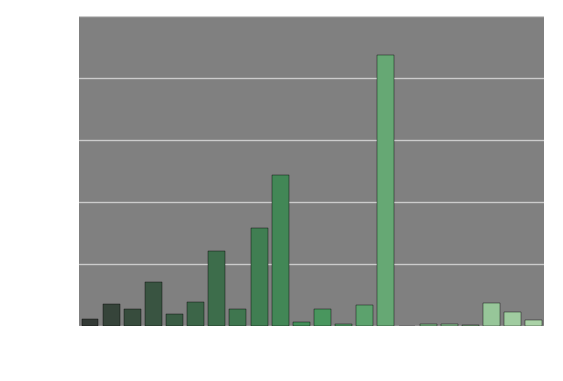

In [42]:
sns.countplot(x="language", data=admin_data, palette="Greens_d"); #spec'ing color palette is op

Ick, those langauge labels are unreadable! Maybe rotating that plot will help? It's a simple matter of plotting on `y` rather than `x`!

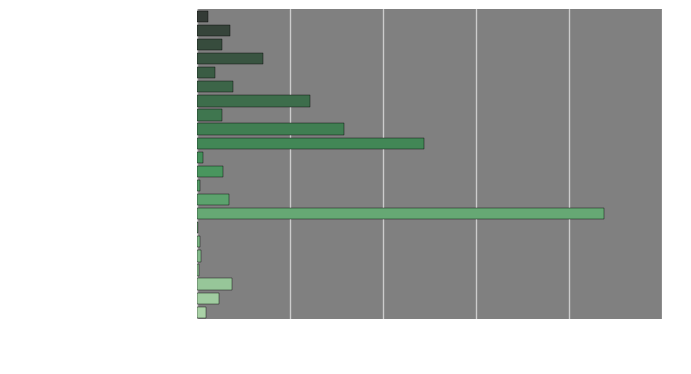

In [43]:
sns.countplot(y="language", data=admin_data, palette="Greens_d");

Okay, so no surprise: Englishes are top contenders: British, and then presumably American? We would want to consult the Wordbank documentation to verify that, if we were serious about this.

The other top languages aren't surprising: European(-ish) and Chinese languages. Great to see less-represented langauges like Kiswahili (aka, Swahili) in there, though!

A brief aside on good visualization practices: Anyone care to comment on my choice (or rather, stealing from the `seaborn` docs!) of color palette here? Hint: What does it imply about the kind of variable `language` is? How would we fix that?

Let's compute a one-way chi-square for those frequencies, just for fun (I say fun because I think it's pretty clear how it'll turn out!)

In [89]:
language_counts = admin_data['language'].value_counts()
language_counts

English (British)         21919
Norwegian                 12225
English                    7902
Danish                     6112
Turkish                    3537
Mandarin                   1938
Spanish                    1872
Russian                    1805
Slovak                     1715
Italian                    1400
Swedish                    1367
French (Quebec)            1364
German                     1181
Cantonese                   987
Croatian                    627
Czech                       493
Hebrew                      314
Kigiriama                   209
Cypriot Greek               176
British Sign Language       161
Kiswahili                   128
American Sign Language       59
Name: language, dtype: int64

In [90]:
import scipy.stats

scipy.stats.chisquare(language_counts)

Power_divergenceResult(statistic=181736.88647375209, pvalue=0.0)

So yes. chi_2 (on how many df, y'all?) = 181736, p<0.0. In other words, so small Python doesn't print it.

[That's probably not good enough to show workshop attendees.....]

In [92]:
language_counts_df = len(language_counts) - 1

scipy.stats.chi2.cdf(language_counts, language_counts_df)

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  0.99998193])

Something MORE complex. Can we visualize:

    how vocab production changes over development (age)
        in English-learning kids
        who are administered the words and sentences version of the CDI (the older one)
    *differently for boys and girls*???

Hey, maybe a scatterplot, with `age` on the x-axis, `production` on the y-axis, and separately hued dots for boys and girls? Let's try that.

First, maybe it's worthwhile calling `admin_data.head()` to remind ourselves of the structure of our data so we know how to fit it into `.lmplot`.

In [44]:
admin_data.head()

,language,form,age,gender,mom_ed,comprehension,production,parent_gender
data_id,,,,,,,,
29821.0,Croatian,WG,13,Female,NaN,293,88,Female
29822.0,Croatian,WG,16,Male,NaN,122,12,Male
29823.0,Croatian,WG,9,Female,NaN,3,0,Female
29824.0,Croatian,WG,12,Female,NaN,0,0,Female
29825.0,Croatian,WG,12,Female,NaN,44,0,Female


Okay, so the `seaborn` function we'll use is called `.lmplot`. I don't know what `lm` is short for ('linear model' wouldn't quite make sense, as you'll see), but it is, in the words of the docs:

> intended as a convenient interface to fit regression models across conditional subsets of a dataset

In our case, we'll examine how `production` changes over `age` with fitted regression models, and the "conditional subsets" will be the different values `gender` can take (`male` and `female`). And the `data` we'll supply to `.lmplot` will be a `.query` of just the English-speaking, WS-administered rows.

Oh, and you can tell `.lmplot` to display a scatterplot of your x variable (`age`) against your y variable (`gender`). To start, we'll just do that instead of displaying a fitted regression model.

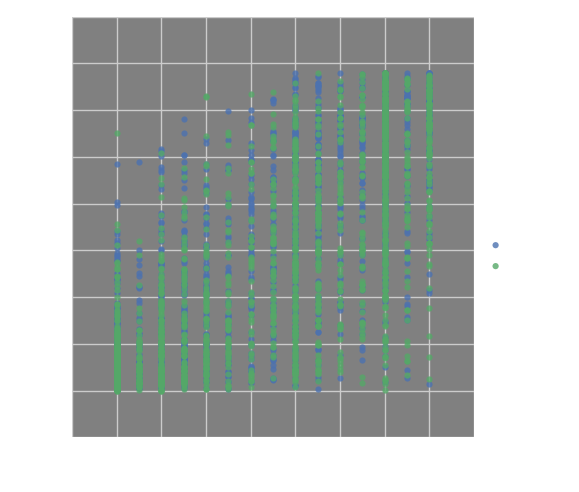

In [45]:
sns.lmplot(x='age',y='production', hue='gender', scatter=True, fit_reg=False,
            data=admin_data.query('form == "WS" & language == "English"'));

Oh, it's kind of hard to read that with all the dots laying on top of each other! Fortunately, `seaborn` makes it super easy to just 'jitter' the datapoints!

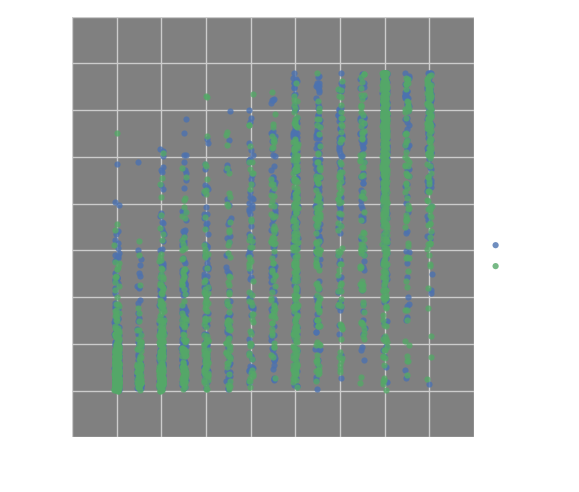

In [84]:
sns.lmplot(x='age',y='production', hue='gender', scatter=True, fit_reg=False,
           data=admin_data.query('form == "WS" & language == "English"'), x_jitter=0.1);

Hmm. Jitter didn't really help! Maybe let's just dispense with displaying individual data points, and instead display a fitted regression model?

You can tell `.lmplot` to fit all kinds of models: polynomials of various order, log(x), logistic regressions, and, maybe (most?) appropriate for our case, lowess regressions. Which basically just fits sequential subsets of your data to different linear regressions, to more smoothly model your data (vs having a single straight line).  

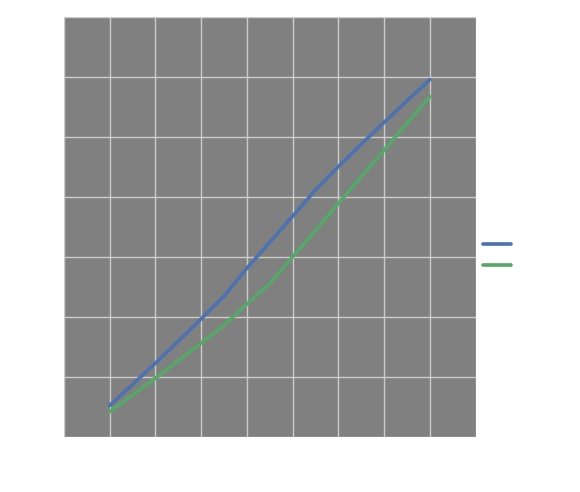

In [46]:
sns.lmplot(x='age',y='production',hue='gender', scatter=False, fit_reg=True, lowess=True,
            data=admin_data.query('form == "WS" & language == "English"'));

That's much better. Now we can clearly see that English-speaking female and male toddlers (~16 months) produce words and gestures at similar rates, but then girls produce more than boys for a while, and boys start to close the gap by 30 months.

[And maybe here's a good place to show a little statsmodels: show the LOWESS regresion model? Or just show another regression that has a significant effect of age, a significant effect of gender, and possibly an age\*gender interaction?]

A still more complex (!) visualization: make separate subplots for the different forms WG and WS! Can it be done? Yes!

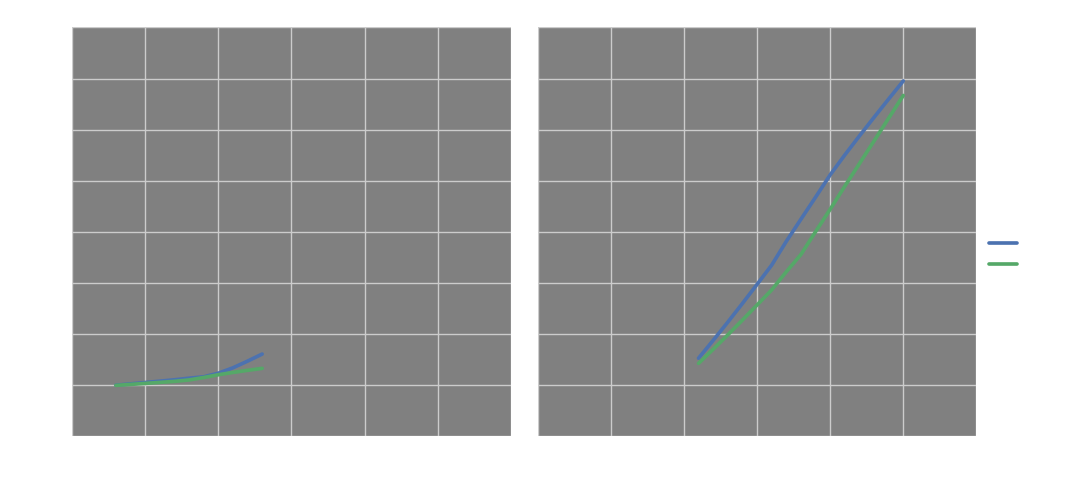

In [47]:
sns.lmplot(x='age',y='production',hue='gender', col='form', scatter=False, lowess=True,
            data=admin_data.query('language == "English"'));

So this now let's us see the WG and WS side-by-side. And we see that the gender gap in production development emerges actually earlier than the WS is administered, around 15-18 months!

I do also wonder if the designers of the WG and WS forms intended that, even though the forms ask different questions, kids around the upper end of the WG and the lower end of the WS -- that is, in the transition from one form to the other -- should score similarly on the different forms! Makes sense that that'd be a desirable property to me!

You can make this even more bonkers, by specifying a `row` parameter in the plotting method, and then you've got a 2d *array* of plots. I've actually done that at least once, so I'll argue it's not necessarilly overkill!

One final note to make of `seaborn`: because the `seaborn` interface is designed so uniformly, trying out different visualizations is oftentimes just a matter of replacing the name of the function at the beginning! So it allows for rapid, painless (IMO!) testing of different visualizations.

**Questions about Seaborn? Any other suggestions for things to try to plot right now?** If we/I don't already know how to do it (very, very possible!), we might be able to figure it out in 5 seconds from the `seaborn` docs!

### Returning to Pandas

In [45]:
instrument_data = pd.read_csv('wordbank-data/instrument_data.csv')
instrument_data.head()

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,data_id,age,sex,mom_ed,value,item_id,type,category,definition
0,51699,27,Female,Some Secondary,produces,item_1,word,sounds,baa baa
1,51699,27,Female,Some Secondary,NaN,item_2,word,sounds,choo choo
2,51699,27,Female,Some Secondary,NaN,item_3,word,sounds,cockadoodledoo
3,51699,27,Female,Some Secondary,produces,item_4,word,sounds,grrr
4,51699,27,Female,Some Secondary,NaN,item_5,word,sounds,meow


In [46]:
instrument_data.shape

(4343650, 9)

In [47]:
item_data = pd.read_csv('wordbank-data/item_data.csv')
item_data.head()

,num_item_id,definition,type,category,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1,baa baa,word,sounds,0.47,0.57,0.61,0.69,0.70,0.63,0.78,0.77,0.79,0.82,0.83,0.82,0.90,0.86,0.92
1,2,choo choo,word,sounds,0.28,0.33,0.51,0.59,0.61,0.59,0.73,0.78,0.81,0.83,0.85,0.85,0.95,0.87,0.93
2,3,cockadoodledoo,word,sounds,0.13,0.11,0.19,0.25,0.27,0.34,0.39,0.38,0.50,0.53,0.56,0.53,0.75,0.57,0.73
3,4,grrr,word,sounds,0.54,0.57,0.63,0.66,0.66,0.64,0.75,0.79,0.83,0.79,0.86,0.81,0.94,0.83,0.89
4,5,meow,word,sounds,0.50,0.49,0.68,0.72,0.73,0.79,0.82,0.86,0.90,0.90,0.94,0.91,0.97,0.93,0.97


## Russell's dissertation data**

** Initially collected with Matt Hall and Marie Coppola for a different project.

These data are of a volume and complexity that really motivate a programmatic analysis. I'm not really sure how one would do all the things I've needed to do with these data in Excel, SPSS, and other tools that are more GUI-based (i.e., point-and-click).

## A few closing notes...

1. For future reference after today....
   1. [Here's](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) a nifty cheatsheet of the pandas basics.
   2. And here's ["10 minutes to pandas"](http://pandas.pydata.org/pandas-docs/stable/10min.html#), a 'quick' tutorial that makes for a nice reference. (Some of this tutorial is taken from that.)
   3. And you can always feel free to contact me. I love this stuff!
2. If you took stats with Eric Lundquist last semester and are curious how those homeworks would be analyzed in Python, contact me -- I did most of them in Jupyter Notebooks (waaaaay shorter and simpler than this one!).
3. If you're interested in (re)analyzing existing datasets like Wordbank, a bunch of psycholinguistic datasets can be found on ASHA's website: [Research Databases and Other Online Tools](http://www.asha.org/research/researcher-tools/databases/). (WordNet, on that list, has a Python interface through the `nltk` library!)

# Questions or comments???